# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np

In [2]:
# Your code here
boston_df = pd.read_csv("../data/boston_data.csv")
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [3]:
boston_df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [4]:
boston_df["chas"].value_counts()

0.0    376
1.0     28
Name: chas, dtype: int64

In [5]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [6]:
#from scipy import stats 
#z = np.abs(stats.zscore(boston))
#boston = boston[(z<3).all(axis=1)]
def outliers(df, col):
    
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    
    upper = df[col].quantile(0.75) + IQR * 1.5
    lower = df[col].quantile(0.25) - IQR * 1.5
    
    data_filtered = df[(df[col] < upper) & (df[col] > lower)]
    return data_filtered

In [7]:
for column in boston_df.columns:
    boston = outliers(boston_df, column)



In [8]:
#boston.drop("chas", axis=1, inplace=True)

In [9]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,3.629924,10.070292,11.360584,0.063660,0.557573,6.212202,68.490186,3.848430,9.931034,415.549072,18.581167,352.830398,13.073528,20.841379
std,8.416852,21.262286,6.753232,0.244472,0.119133,0.569330,27.956632,2.122297,8.908848,171.161981,2.056940,97.404976,6.726074,6.449545
min,0.006320,0.000000,0.740000,0.000000,0.392000,3.561000,2.900000,1.178100,1.000000,187.000000,12.600000,0.320000,1.980000,5.600000
25%,0.082440,0.000000,5.640000,0.000000,0.449000,5.888000,45.800000,2.100700,4.000000,284.000000,17.400000,374.560000,7.600000,16.600000
50%,0.239120,0.000000,9.900000,0.000000,0.538000,6.209000,76.500000,3.317500,5.000000,334.000000,19.100000,391.270000,11.740000,20.900000
75%,4.222390,12.500000,18.100000,0.000000,0.647000,6.546000,94.100000,5.287300,24.000000,666.000000,20.200000,396.210000,17.120000,24.200000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,36.500000


### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [10]:
# Your plots here
boston.corr().style.background_gradient(cmap='coolwarm')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200350,0.411395,-0.067236,0.408136,-0.136751,0.354484,-0.388838,0.614069,0.574769,0.290419,-0.421248,0.418139,-0.479316
zn,-0.200350,1.000000,-0.534754,-0.062261,-0.497000,0.314638,-0.538259,0.678684,-0.307348,-0.282164,-0.350848,0.179205,-0.429418,0.429200
indus,0.411395,-0.534754,1.000000,0.041120,0.766249,-0.338828,0.632352,-0.726128,0.614940,0.713099,0.344942,-0.383449,0.627333,-0.627188
chas,-0.067236,-0.062261,0.041120,1.000000,0.104855,0.068678,0.080993,-0.096755,-0.045603,-0.072786,-0.132475,0.037408,-0.005345,0.088735
nox,0.408136,-0.497000,0.766249,0.104855,1.000000,-0.277802,0.728159,-0.765396,0.610982,0.660309,0.165194,-0.398581,0.604963,-0.576721
rm,-0.136751,0.314638,-0.338828,0.068678,-0.277802,1.000000,-0.235620,0.241310,-0.131394,-0.187406,-0.203479,0.103038,-0.523259,0.531865
age,0.354484,-0.538259,0.632352,0.080993,0.728159,-0.235620,1.000000,-0.728738,0.467976,0.506565,0.241339,-0.286845,0.646424,-0.554163
dis,-0.388838,0.678684,-0.726128,-0.096755,-0.765396,0.241310,-0.728738,1.000000,-0.510716,-0.541730,-0.239316,0.321938,-0.554563,0.444434
rad,0.614069,-0.307348,0.614940,-0.045603,0.610982,-0.131394,0.467976,-0.510716,1.000000,0.917426,0.476636,-0.478142,0.502016,-0.532161
tax,0.574769,-0.282164,0.713099,-0.072786,0.660309,-0.187406,0.506565,-0.541730,0.917426,1.000000,0.450510,-0.470051,0.542077,-0.604167


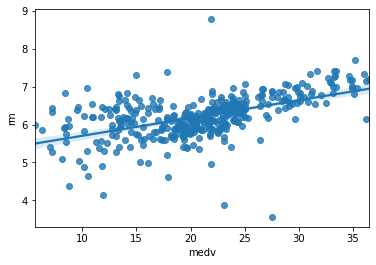

In [11]:
sns.regplot(boston['medv'],boston['rm'])

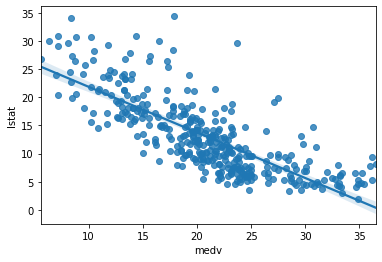

In [12]:
sns.regplot(boston['medv'],boston['lstat'])

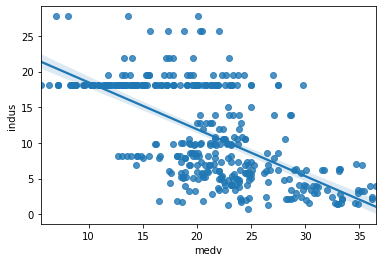

In [13]:
sns.regplot(boston['medv'],boston['indus'])

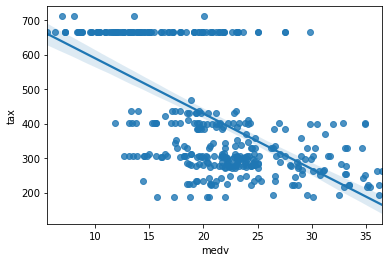

In [14]:
sns.regplot(boston['medv'],boston['tax'])

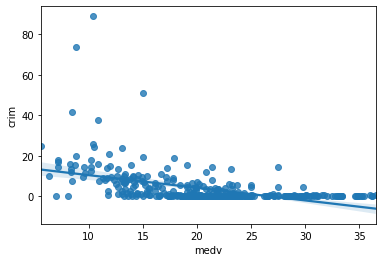

In [15]:
sns.regplot(boston['medv'],boston['crim'])

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [16]:
# Your response here

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [17]:
# Your response here

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [18]:
# Your code here
boston["medv"].describe()

count    377.000000
mean      20.841379
std        6.449545
min        5.600000
25%       16.600000
50%       20.900000
75%       24.200000
max       36.500000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance metric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [19]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_pred)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [20]:
# Your code here
from sklearn.model_selection import train_test_split
X = boston.drop(["medv"], axis=1)
y = boston["medv"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, shuffle = True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [21]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor
depth = [2,4,6,8,10]
r2_tr = []
r2_ts = []
for i in depth:
    regr = RandomForestRegressor(max_depth=i, random_state=0).fit(X_train,y_train)
    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)
    r2_score_train = r2_score(y_train, y_train_pred)
    r2_score_test = r2_score(y_test, y_test_pred)
    r2_tr.append(r2_score_train)
    r2_ts.append(r2_score_test)
    print("R2 score - Max depth:", i, "- Train:", r2_score_train, "- Test:", r2_score_test)

R2 score - Max depth: 2 - Train: 0.7308297676974603 - Test: 0.7387996164787687
R2 score - Max depth: 4 - Train: 0.878323491650195 - Test: 0.8385378702029855
R2 score - Max depth: 6 - Train: 0.9388901497412787 - Test: 0.8535604203926919
R2 score - Max depth: 8 - Train: 0.9621638446188328 - Test: 0.8611682405702583
R2 score - Max depth: 10 - Train: 0.9681781583170715 - Test: 0.8599270749491243


Now, plot the score for each tree on the training set and on the testing set.

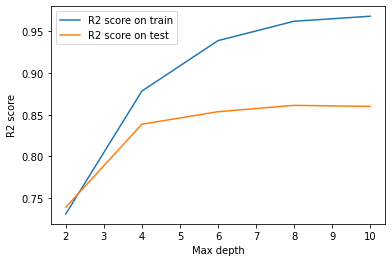

In [22]:
# Produce a plot with the score for the testing and training for the different max depths
plt.plot(depth, r2_tr, label="R2 score on train")
plt.plot(depth, r2_ts, label="R2 score on test")
plt.ylabel("R2 score")
plt.xlabel("Max depth")
plt.legend()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [23]:
# Your response here
# It seems that the model is overfitting, with higher max_depth

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [24]:
# Your response here
depth = [1,10]
for i in depth:
    regr = RandomForestRegressor(max_depth=i, random_state=0).fit(X_train,y_train)
    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)
    r2_score_train = r2_score(y_train, y_train_pred)
    r2_score_test = r2_score(y_test, y_test_pred)
    print("R2 score - Max depth:", i, "- Train:", r2_score_train, "- Test:", r2_score_test)

R2 score - Max depth: 1 - Train: 0.5186362520317713 - Test: 0.4209957921064569
R2 score - Max depth: 10 - Train: 0.9681781583170715 - Test: 0.8599270749491243


In [25]:
# With max depth of 1: high Bias
# With max depth of 10: high Variance

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [26]:
# Your response here
# I would say this: R2 score - Max depth: 4 - Train: 0.878323491650195 - Test: 0.8385378702029855

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [27]:
# Your response here
# 1 - It does not seem to be very relevant.
# 2 - It seems sufficient. We can extract more data related to the houses.
# 3 - As the data is old and only related to Boston, it does not seem to be robust enough.
# 4 - It is very unlikely.